# Results and Figures in the Supplementary Information

In [1]:
# import modules
# uncomment it if we use common.ipynb instead of common.py (that is, if we import the notebook as a module)
#import import_ipynb 
from common import *
rcParams['font.sans-serif'] = "Arial"
rcParams['font.family'] = "sans-serif"

In [2]:
# save figures in the folder
_Figure_PATH_ = './figures/SI/'

## Player X uses an extortionate ZD strategy

### What would the payoffs $s_X$ and $s_Y$ be if for player Y

* $q_4 = 0$
* $q = (1, 1, 1, 1) = \text{ALLC}$

### How would the payoff $s_X$ change with respect to $\chi$ if for player Y

* $q = (1, 0, 0, 1) = \text{Win-Stay Lose-Shift}$  
* $q = (q, q, q, q)$

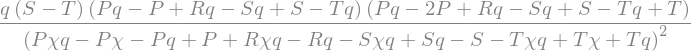

In [3]:
factor(s_X_ext.subs(q_4, 0)), factor(s_Y_ext.subs(q_4, 0)) # q_4 = 0
factor(s_X_ext.subs(Cooperator_q) - P), factor(s_Y_ext.subs(Cooperator_q) - P) # q = [1, 1, 1, 1] = ALLC
factor(diff(s_X_ext.subs(WinStayLoseShift_q), chi)) # q = [1, 0, 0, 1] = Win-Stay Lose-Shift
factor(diff(s_X_ext.subs([(q_1, q), (q_2, q), (q_3, q), (q_4, q)]), chi)) # q = [q, q, q, q]

### How would the payoff $s_X$ change with respect to $\chi$ 

#### in the conventional IPD game with $T + S > 2P$

* q is a common strategy such as ALLC, ALLD, and TFT

* q is another strategy such as ZD Gen2 and PSO Gambler Mem1
    
#### in a general IPD game with $T + S < 2P$

* $q = (1, 0, 0, 1) = \text{Win-Stay Lose-Shift}$

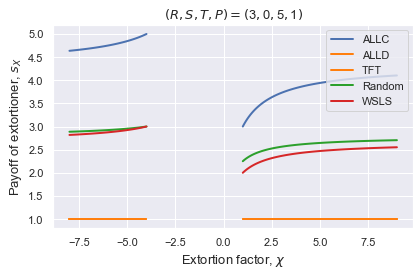

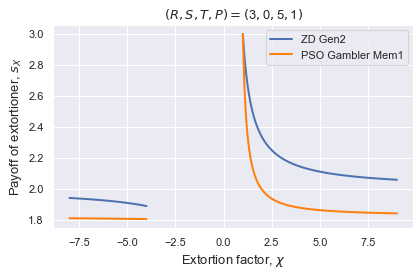

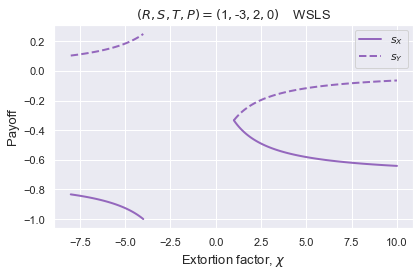

In [4]:
# conventioanl IPD game, common strategies
payoff_1D(s_X_ext, s_Y_ext, payoff_con_subs, 
          [Cooperator_q, Defector_q, TitForTat_q, Random_q, WinStayLoseShift_q], 
          ['ALLC', 'ALLD', 'TFT', 'Random', 'WSLS'], 
          np.linspace(1, 9, 101), np.linspace(-8, -4, 101), 'con_common_strategies')
# conventioanl IPD game, other strategies
payoff_1D(s_X_ext, s_Y_ext, payoff_con_subs, [ZDGEN2_q, PSOGamblerMem1_q], 
          ['ZD Gen2', 'PSO Gambler Mem1'], 
          np.linspace(1, 9, 101), np.linspace(-8, -4, 101), 'con_uncommon_strategies')
# general IPD game with T + S < 2P, Win-Stay Lose-Shift
payoff_1D(s_X_ext, s_Y_ext, payoff_abn_subs, [WinStayLoseShift_q], ['WSLS'], 
          np.linspace(1, 10, 101), np.linspace(-8, -4, 101), 'abn_wsls', 4, 'XY') # np.linspace(-8, -1.5, 101)

### The other parameter $\phi$ may affect the dependence of $s_X$ ($s_Y$) on the extortion factor $\chi$ in a non-trivial way

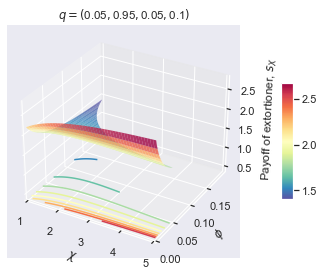

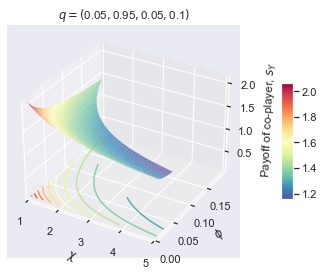

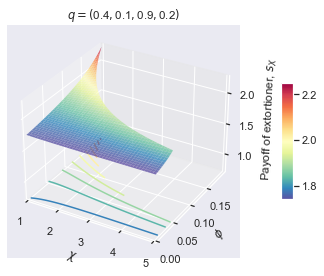

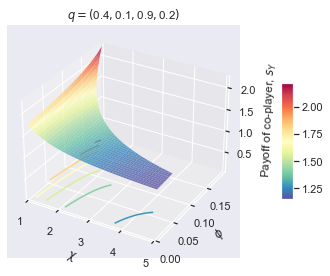

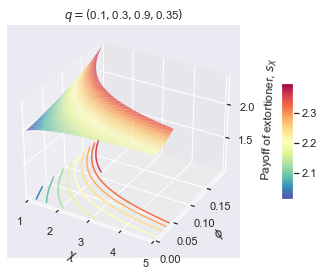

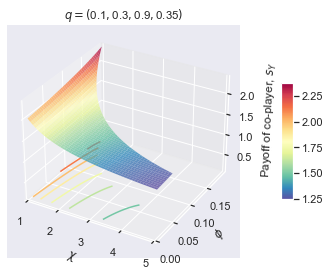

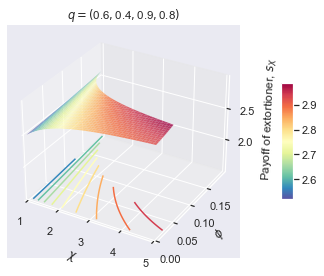

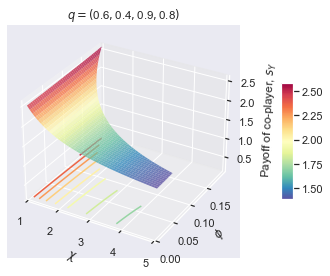

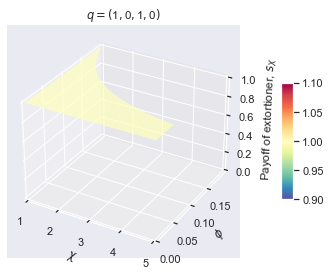

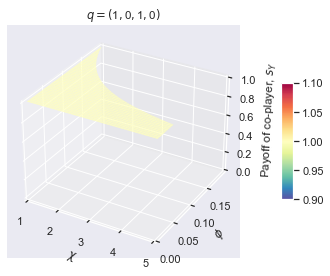

In [5]:
q_subs_list = [q_subs_1, q_subs_2, q_subs_3, q_subs_4]
for i, q_subs in enumerate(q_subs_list):
    s_X_3D(s_X_ext, payoff_con_subs, phi_upper_con, q_subs, 'Spectral_r', 13.5, i + 1)
    s_Y_3D(s_Y_ext, payoff_con_subs, phi_upper_con, q_subs, 'Spectral_r', 13.5, i + 1)
s_X_3D(s_X_ext, payoff_con_subs, phi_upper_con, TitForTat_q, 'Spectral_r', 13.5, 'TFT')
s_Y_3D(s_Y_ext, payoff_con_subs, phi_upper_con, TitForTat_q, 'Spectral_r', 13.5, 'TFT')

### If $\chi$ is fixed, $s_X$ ($s_Y$) becomes a monotonic function of $\phi$
> section 11 in the SI

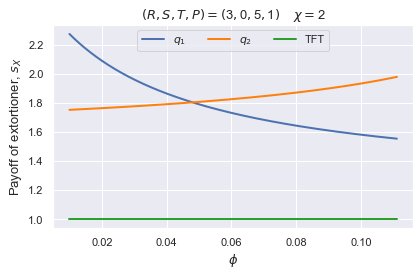

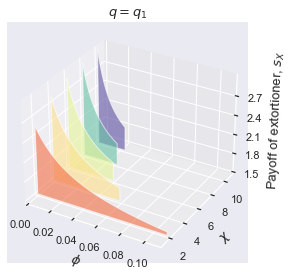

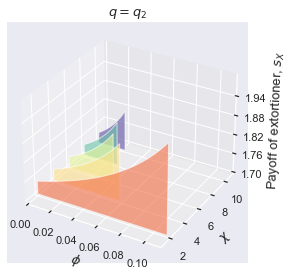

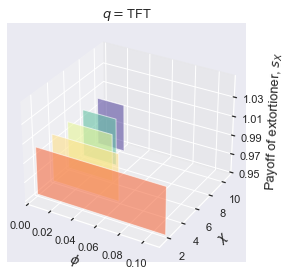

In [6]:
q_subs_list = [q_subs_1, q_subs_2, TitForTat_q]
s_X_2D(s_X_ext, payoff_con_subs, [(chi, 2)], phi_upper_con, q_subs_list, [r'$q_1$', r'$q_2$', 'TFT'])
for i, q_subs in enumerate(q_subs_list):
    s_X_poly(s_X_ext, payoff_con_subs, phi_upper_con, q_subs, 15, (lambda x: x + 1 if x <= 1 else 'TFT')(i))

### How can $s_X$ be independent of $\phi$
#### Solution X
* $q_1 = q_2 = 1$

#### Solution O
* $q_4 = 0$

#### Solution A
* $q_1 = 1$ and $q_3 = 0$

#### Solution B
* $q_2 = q_3 = 0$

#### Solution C
* $q_1 = q_2 = q_3$

#### Solution D
* $q_4 = h_D = [-(T + S - 2P)q_1 + (R - P)(q_2 + q_3) + T + S - R - P]/[2R - T - S]$

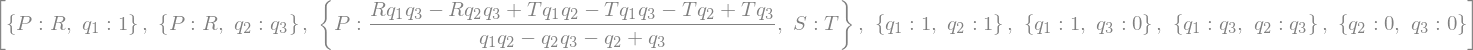

In [7]:
# general IPD game with T + S >= 2P (similar for T + S < 2P)
num, deno = fraction(factor(s_X_ext.subs(phi, phi_upper_con) - s_X_ext.subs(phi, phi_upper_con/2)))
# target: a chi-free term*a linear function of chi
target = factor(num/(chi*q_4*(T - S)*(T*chi - P*chi + P - S)*(P*chi - S*chi + T - P))) # solution O: q_4 = 0
factor_1 = factor_list(target)[1][0][0] # a linear function of chi
factor_0 = factor_list(target)[1][1][0]*factor_list(target)[0] # a chi-free term, solution D: q_4 = h_D
f_11, f_10 = factor_1.coeff(chi, 1), factor_1.coeff(chi, 0)
solve([f_11, f_10]) # solutions X, A, B, and C

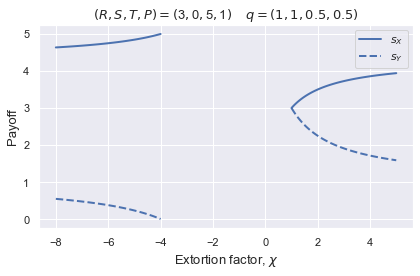

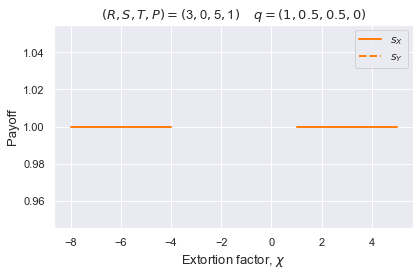

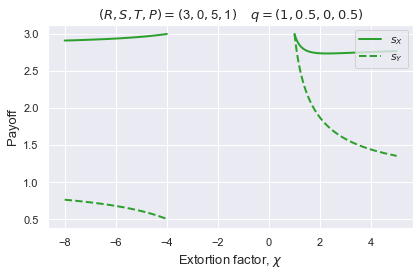

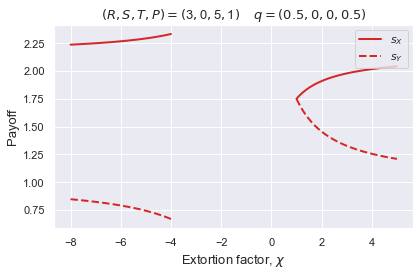

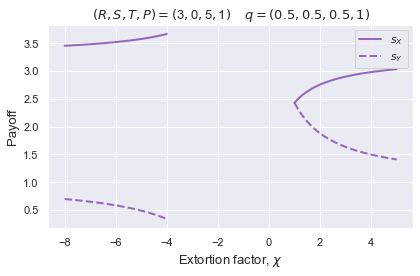

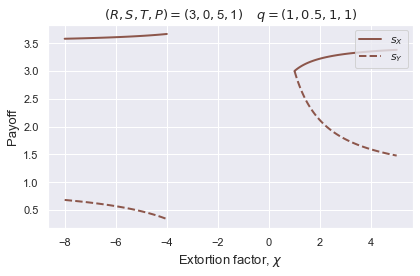

In [8]:
# conventioanl IPD game
# examples for solutions O, X, A, B, C, and D
q_subs_X = [(q_1, 1), (q_2, 1), (q_3, 0.5), (q_4, 0.5)] 
q_subs_O = [(q_1, 1), (q_2, 0.5), (q_3, 0.5), (q_4, 0)] 
q_subs_A = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.5)] 
q_subs_B = [(q_1, 0.5), (q_2, 0), (q_3, 0), (q_4, 0.5)] 
q_subs_C = [(q_1, 0.5), (q_2, 0.5), (q_3, 0.5), (q_4, 1)]
q_subs_D = [(q_1, 1), (q_2, 0.5), (q_3, 1), (q_4, 1)]
q_subs_list = [q_subs_X, q_subs_O, q_subs_A, q_subs_B, q_subs_C, q_subs_D]
strategies = [r'$q = (1, 1, 0.5, 0.5)$', r'$q = (1, 0.5, 0.5, 0)$', r'$q = (1, 0.5, 0, 0.5)$', 
              r'$q = (0.5, 0, 0, 0.5)$', r'$q = (0.5, 0.5, 0.5, 1)$', r'$q = (1, 0.5, 1, 1)$']
names = ['con_X', 'con_O', 'con_A', 'con_B', 'con_C', 'con_D']
for i, q_subs in enumerate(q_subs_list):
    payoff_1D(s_X_ext, s_Y_ext, payoff_con_subs, [q_subs], [strategies[i]], 
              np.linspace(1, 5, 101), np.linspace(-8, -4, 101), names[i], i, 'XY')

## Player Y uses an unbending strategy
> consistent with the notations in the supplementary information

### ~~Class X~~ 
* $q_1 = q_2 = 1$
$$s_X = \frac{(T - S)(R - P)\chi}{(R - S)\chi + (T - R)} + P \qquad \text{and} \qquad \frac{ds_X}{d\chi} = \frac{(T - R)(T - S)(R - P)}{[(R - S)\chi + (T - R)]^2} > 0$$

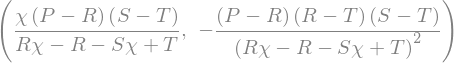

In [9]:
# Class X
s_XX_ext = collect(cancel(s_X_ext.subs([(q_1, 1), (q_2, 1)])), chi)
factor(s_XX_ext - P), factor(diff(s_XX_ext, chi))

### ~~Class O~~ 
* $q_4 = 0$

$$s_X = P$$

In [10]:
# Class O
s_XO_ext = collect(cancel(s_X_ext.subs([(q_4, 0)])), chi)
s_XO_ext

### Class A
* $q_1 = 1$ and $q_3 = 0$

In [11]:
s_XA_ext = cancel(s_X_ext.subs([(q_1, 1), (q_3, 0)])); s_YA_ext = cancel(s_Y_ext.subs([(q_1, 1), (q_3, 0)]))
# the numerator of s_XA - P: (T - S)*(R - P)*q_4*chi*(a_{A1}*chi + a_{A0})
num = collect(factor_list(fraction(factor(s_XA_ext - P))[0])[1][4][0], chi)
a_A1, a_A0 = [collect(num.coeff(chi, i), q_2) for i in [1, 0]]
num_o, deno_o = fraction(factor(s_XA_ext - P)); num_o, deno_o = -num_o, collect(-deno_o, chi)
# the denominator of s_XA - P: d_{A2}*chi**2 + d_{A1}*chi + d_{A0}
d_A2, d_A1, d_A0 = [collect(deno_o.coeff(chi, i), q_4) for i in [2, 1, 0]]
num, deno = fraction(factor(diff(s_XA_ext, chi)))
target_A  = cancel(num/(q_4*(T - S)*(R - P))); target_A = collect(target_A, chi)
e_2, e_1, e_0 = [collect(target_A.coeff(chi, i), q_4) for i in [2, 1, 0]]
e_21, e_20 = [factor(e_2.coeff(q_4, i)) for i in [1, 0]]
e_11, e_10 = [factor(e_1.coeff(q_4, i)) for i in [1, 0]]
e_01, e_00 = [factor(e_0.coeff(q_4, i)) for i in [1, 0]]
w_2, w_1, w_0 = [factor(e_21.coeff(q_2, i)) for i in [2, 1, 0]]
u, v = [cancel(e_20/((R - P)*(1 - q_2))).coeff(q_2, i) for i in [1, 0]]
Gamma = collect(factor((e_2 + e_1 + e_0)/((T - S)**2*q_2)), q_4) # Gamma is a factor of g(1) = e_2 + e_1 + e_0
gamma = collect(factor(e_1/(2*((P - S)*q_2 + (T + S - 2*P)))), q_4) # gamma is a factor of e_1
q_a, h_A_con, h_A_abn = factor(-v/u), -e_20/e_21, solve(Gamma, q_4)[0]

In [12]:
# is POS Gambler always unbending?
factor(e_2.subs(PSOGamblerMem1_q).subs([(R, 3), (S, 0), (T, 5), (P, 1)]))
factor(e_2.subs(PSOGamblerMem1_q).subs([(R, 3), (S, 0), (T, 10), (P, 1)]))
factor(Gamma.subs(PSOGamblerMem1_q).subs([(R, 1), (S, -3), (T, 2), (P, 0)]))
factor(Gamma.subs(PSOGamblerMem1_q).subs([(R, 1), (S, -3), (T, 4.8), (P, 0.95)]))

#### Strategies near $q = (1, 1, 0, 0)$ repeating

* $q_1 = 1$, $q_2 = 1 - \delta$, $q_3 = 0$, and $q_4 = \varepsilon$

* $\delta \to 0$ and $\varepsilon \to 0$

* $(R - P)\delta > (T - R)\varepsilon$


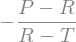

In [13]:
# unbending strategies near q_2 = 1 and q_4 = 0, that is, q = (1, 1, 0, 0)
q_sub = [(q_1, 1), (q_2, 1 - delta), (q_3, 0), (q_4, epsilon)]
e_2_ne = factor(e_2.subs(q_sub)) # ne for neighborhood
# (T - R)*epsilon - (R - P)*delta < 0
factor((e_2_ne.coeff(delta, 1).coeff(epsilon, 0)*delta + e_2_ne.coeff(delta, 0))/(T - P)**2)
Gamma_ne = factor(Gamma.subs(q_sub)) # ne for neighborhood
# (T - R)*epsilon - (R - P)*delta < 0
factor(Gamma_ne - Gamma_ne.coeff(delta, 1).coeff(epsilon, 1)*delta*epsilon) 
# slope of the tangent line at q_2 = 1 and q_4 = 0
factor(diff(solve(e_2, q_4)[0], q_2).subs(q_2, 1).subs(q_4, 0)) # T + S > 2P
factor(diff(solve(Gamma, q_4)[0], q_2).subs(q_2, 1).subs(q_4, 0)) # T + S < 2P

1. #### $T + S > 2P$

> $e_2 \leq 0$ is the necessary and sufficient condition for $\frac{d s_X}{d \chi} < 0$

* 
  * conventional IPD game
    * $(R, S, T, P) = (3, 0, 5, 1)$
    
  * donation game
    * $(R, S, T, P) = (b - c, -c, b, 0)$
    
  * general IPD game
    * $(R, S, T, P) = (2.35, 0, 2.4, 1)$, where $T \approx R$
    

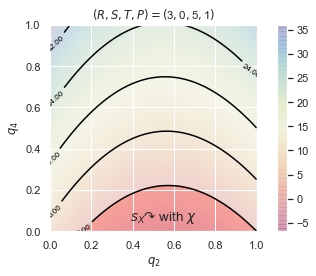

In [14]:
# conventional IPD game
factor((s_XA_ext - P).subs(payoff_con_subs))
# region of Class A
target_A_plot(s_XA_ext)

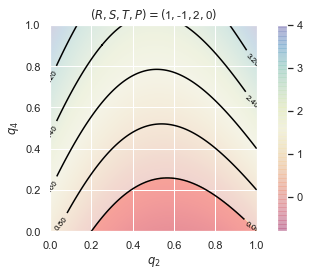

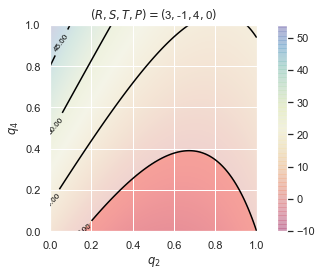

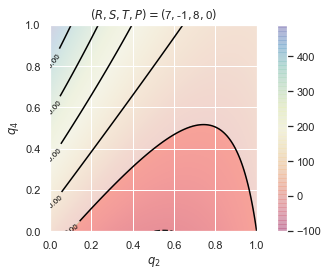

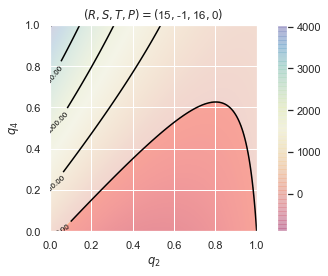

In [15]:
# donation game with benefit-cost ratio b/c = r and cost c = 1
factor(s_XA_ext.subs(payoff_dg_subs))
# region of Class A
for ratio in [2, 4, 8, 16]: # benefit-cost ratio r
    target_A_plot(s_XA_ext, [(R, ratio - 1), (S, -1), (T, ratio), (P, 0)], 'dg_' + str(ratio))

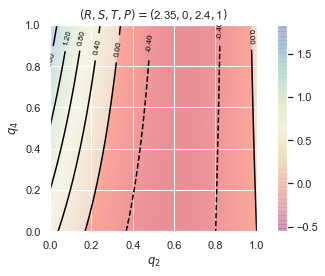

In [16]:
# general IPD game with T close to R
# region of Class A
target_A_plot(s_XA_ext, payoff_insane_subs, 'con_x')

2. #### $T + S = 2P$

> $d_0 < 0$ is the necessary and sufficient condition for $\frac{ds_X}{d\chi} < 0$

* 
  * General IPD game
    * $(R, S, T, P) = (3, 0, 5, 2.5)$

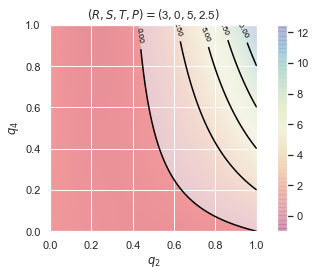

In [17]:
factor((s_XA_ext - P).subs(P, (T + S)/2))
d_A1_eqn, d_A0_eqn = [collect(-fraction(factor(s_XA_ext.subs(P, (T + S)/2) - (T + S)/2))[1].coeff(chi, i), q_4) for i in [1, 0]]
# region of Class A
target_A_plot(s_XA_ext, payoff_eqn_subs, 'eqn')

3. #### $T + S < 2P$

> $g(1) = e_2 + e_1 + e_0 \leq 0$ is the necessary and sufficient condition for $\frac{ds_X}{d\chi} < 0$

* 
  * General IPD game
    * $(R, S, T, P) = (1, -3, 2, 0)$

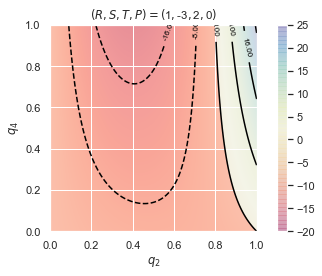

In [18]:
# region of Class A
target_A_plot(s_XA_ext, payoff_abn_subs, 'abn')

#### How would the payoffs $s_X$ and $s_Y$ change with respect to $\chi$ 

In [19]:
q_subs_A_con = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.2)] # an example for Case 1: T + S > 2P
q_subs_A_eqn = [(q_1, 1), (q_2, 0.4), (q_3, 0), (q_4, 0.6)] # an example for Case 2: T + S = 2P
# three examples for Case 3: T + S < 2P 
q_subs_A_abn_0 = [(q_1, 1), (q_2, 0), (q_3, 0), (q_4, 0.8)] # s_X < s_Y for chi > 1
q_subs_A_abn_1 = [(q_1, 1), (q_2, 0.1), (q_3, 0), (q_4, 0.8)] # s_X < s_Y for chi > -a_0/a_1
q_subs_A_abn_2 = [(q_1, 1), (q_2, 0.6), (q_3, 0), (q_4, 0.6)] # s_X > s_Y
q_subs_list = [q_subs_A_con, q_subs_A_eqn, q_subs_A_abn_0, q_subs_A_abn_1, q_subs_A_abn_2]
payoff_subs_list = [payoff_con_subs, payoff_eqn_subs] + [payoff_abn_subs]*3
phi_uppers = [phi_upper_con]*2 + [phi_upper_abn]*3
colormaps = ['viridis']*2 + ['magma']*2 + ['viridis']
names = ['A_con', 'A_eqn', 'A_abn_0', 'A_abn_1', 'A_abn_2']

In [20]:
# -a_0/a_1
a_A0.subs(payoff_abn_subs + q_subs_A_abn_1), -a_A1.subs(payoff_abn_subs + q_subs_A_abn_1)

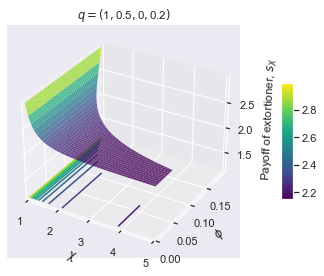

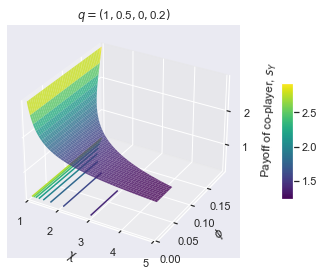

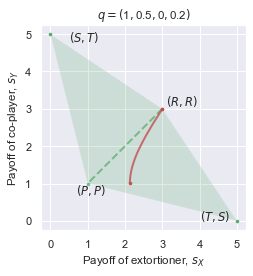

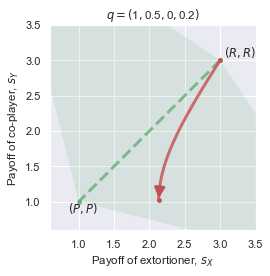

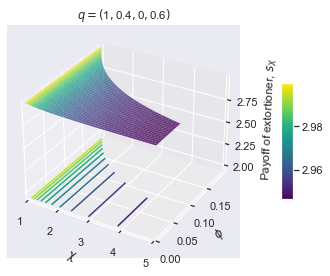

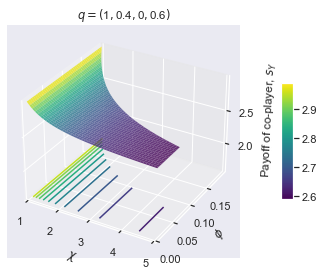

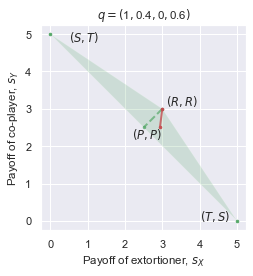

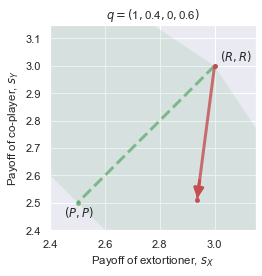

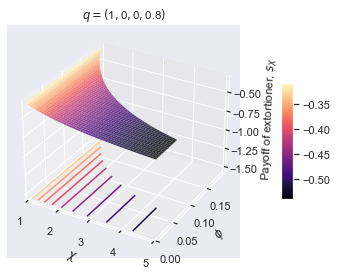

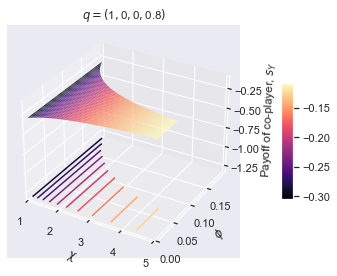

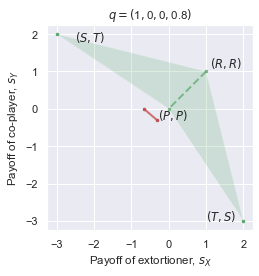

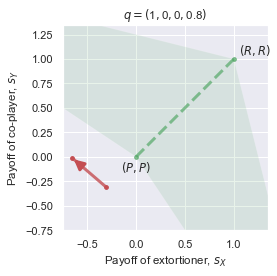

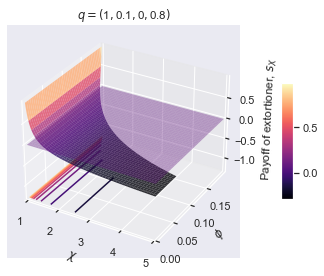

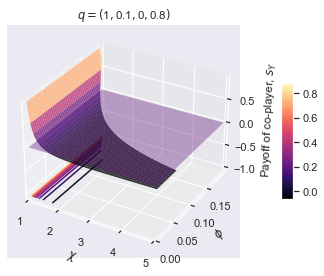

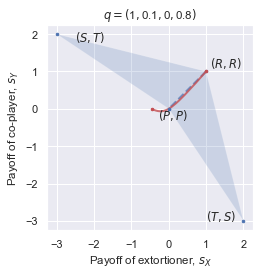

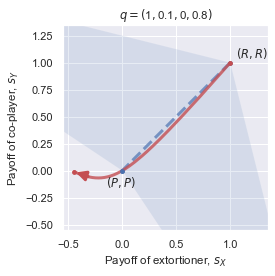

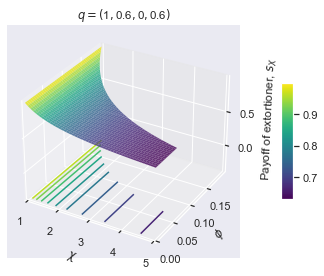

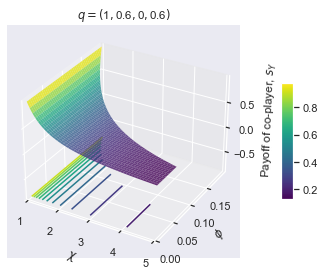

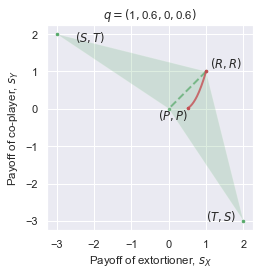

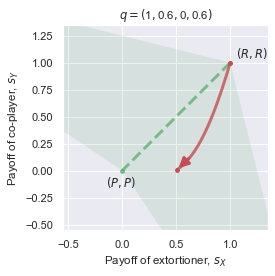

In [21]:
for i, q_subs in enumerate(q_subs_list):
    s_X_3D(s_X_ext, payoff_subs_list[i], phi_uppers[i], q_subs, colormaps[i], 13.5, names[i]) # s_X, 3D surface plot
    s_Y_3D(s_Y_ext, payoff_subs_list[i], phi_uppers[i], q_subs, colormaps[i], 13.5, names[i]) # s_Y, 3D surface plot
    # s_X and s_Y, quadrilateral plot
    payoff_quad(s_XA_ext, s_YA_ext, payoff_subs_list[i], q_subs, names[i], chi_1 = (lambda x: 1.2/0.7 if x == 3 else 1)(i))
    payoff_quad(s_XA_ext, s_YA_ext, payoff_subs_list[i], q_subs, names[i], chi_1 = (lambda x: 1.2/0.7 if x == 3 else 1)(i), 
                zoom = True) # zoom in and see the details of the plot

### Class B
* $q_2 = q_3 = 0$

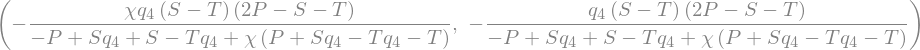

In [22]:
s_XB_ext = cancel(s_X_ext.subs([(q_2, 0), (q_3, 0)])); s_YB_ext = cancel(s_Y_ext.subs([(q_2, 0), (q_3, 0)]))
collect(factor(s_XB_ext - P), chi), collect(factor(s_YB_ext - P), chi)

In [23]:
num, deno = fraction(factor(diff(s_XB_ext, chi)))
target_B = factor(num/(q_4*(T - S)))
target_B # for Case 3: T + S < 2P, the derivative of s_X is negative

#### How would the payoffs $s_X$ and $s_Y$ change with respect to $\chi$ 

In [24]:
q_subs_B_abn_1 = [(q_1, 0.2), (q_2, 0), (q_3, 0), (q_4, 0.2)]
q_subs_B_abn_2 = [(q_1, 0.4), (q_2, 0), (q_3, 0), (q_4, 0.4)]
q_subs_B_abn_3 = [(q_1, 0.6), (q_2, 0), (q_3, 0), (q_4, 0.6)]
q_subs_B_abn_4 = [(q_1, 0.8), (q_2, 0), (q_3, 0), (q_4, 0.8)]

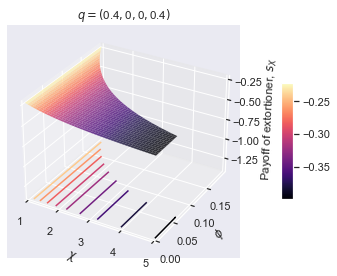

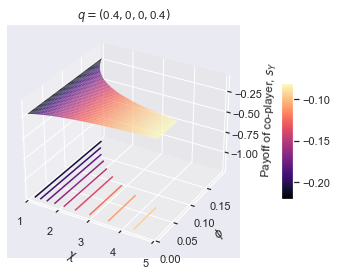

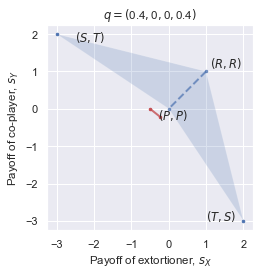

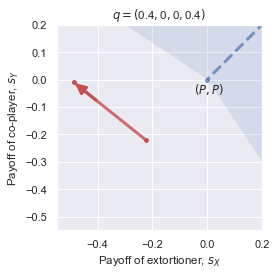

In [25]:
# Case 3: T + S < 2P
# s_X < s_Y
s_X_3D(s_X_ext, payoff_abn_subs, phi_upper_abn, q_subs_B_abn_2, 'magma', 13.5, 'B_abn_2') # s_X, 3D surface plot
s_Y_3D(s_Y_ext, payoff_abn_subs, phi_upper_abn, q_subs_B_abn_2, 'magma', 13.5, 'B_abn_2') # s_Y, 3D surface plot
# s_X and s_Y, quadrilateral plot
payoff_quad(s_XB_ext, s_YB_ext, payoff_abn_subs, q_subs_B_abn_2, 'B_abn_2') 
payoff_quad(s_XB_ext, s_YB_ext, payoff_abn_subs, q_subs_B_abn_2, 'B_abn_2', zoom = True) # zoom in and see the details

### Class C
* $q_1 = q_2 = q_3$

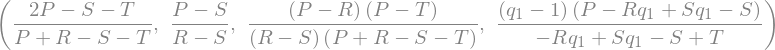

In [22]:
s_XC_ext = cancel(s_X_ext.subs([(q_2, q_1), (q_3, q_1)])); s_YC_ext = cancel(s_Y_ext.subs([(q_2, q_1), (q_3, q_1)]))
d_C1 = fraction(collect(factor(s_XC_ext - P), chi))[1].coeff(chi, 1)
num, deno = fraction(factor(diff(s_XC_ext, chi)))
target_C = factor(num/((T - S)*q_4)) # target_C = a_{C0}*d_{C0}
a_C0, d_C0 = factor_list(target_C)[1][0][0], factor_list(target_C)[0]*factor_list(target_C)[1][1][0]
a_C0, d_C0  = collect(a_C0, q_1), collect(d_C0, q_4)
d_01, d_00 = [factor(d_C0.coeff(q_4, i)) for i in [1, 0]] # d_{C0} = d_{01}*q_4 + d_{00}
h_C = -d_00/d_01
q_c = solve(a_C0, q_1)[0] # lowercase c
q_C = solve(d_C0.subs(q_4, 0), q_1)[1] # uppercase C
q_c, q_C, factor(q_C - q_c), h_C # for Case 3: T + S < 2P, q_c < q_C

1. #### $T + S > 2P$

> $d_{C0} < 0$ is the necessary and sufficient condition for $\frac{d s_X}{d \chi} < 0$

* 
  * Conventional IPD game

    * $(R, S, T, P) = (3, 0, 5, 1)$

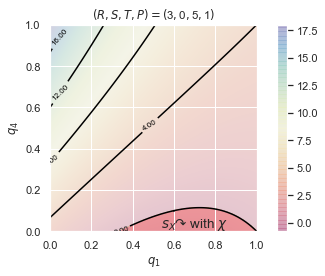

In [23]:
# region of Class C
target_C_plot(s_XC_ext)

2. #### $T + S = 2P$
> $d_{C0} < 0$ is the necessary and sufficient condition for $\frac{ds_X}{d\chi} < 0$

* 
  * General IPD game
    * $(R, S, T, P) = (3, 0, 5, 2.5)$

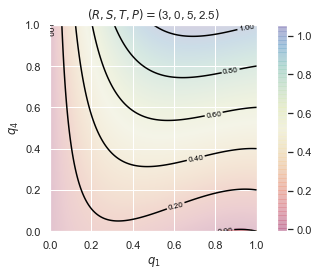

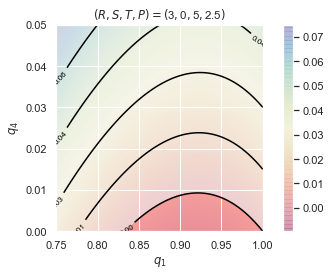

In [24]:
# region of Class C
target_C_plot(s_XC_ext, payoff_eqn_subs, 'eqn') 
target_C_plot(s_XC_ext, payoff_eqn_subs, 'eqn', zoom = True) # zoom in and see the details

3. #### $T + S < 2P$
> $a_{C0}d_{C0} < 0$ is the necessary and sufficient condition for $\frac{ds_X}{d\chi} < 0$

* 
  * General IPD game
    * $(R, S, T, P) = (1, -3, 2, 0)$

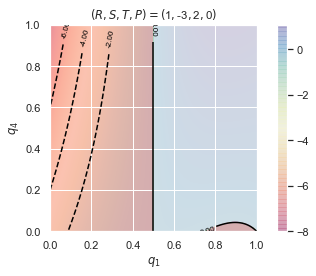

In [25]:
# region of Class C
target_C_plot(s_XC_ext, payoff_abn_subs, 'abn')

#### How would the payoffs $s_X$ and $s_Y$ change with respect to $\chi$ 

In [26]:
q_subs_C_con = [(q_1, 0.7), (q_2, 0.7), (q_3, 0.7), (q_4, 0.1)] # an example for Case 1
q_subs_C_eqn = [(q_1, 0.9), (q_2, 0.9), (q_3, 0.9), (q_4, 0.005)] # an example for Case 2
# two examples for Case 3
q_subs_C_abn_1 = [(q_1, 0.2), (q_2, 0.2), (q_3, 0.2), (q_4, 0.4)] # 0 < q_1 < q_c, s_X < s_Y
q_subs_C_abn_2 = [(q_1, 0.9), (q_2, 0.9), (q_3, 0.9), (q_4, 0.02)] # q_C < q_1 < 1, s_X > s_Y
q_subs_list = [q_subs_C_con, q_subs_C_eqn, q_subs_C_abn_1, q_subs_C_abn_2]
payoff_subs_list = [payoff_con_subs, payoff_eqn_subs, payoff_abn_subs, payoff_abn_subs]
phi_uppers = [phi_upper_con, phi_upper_con, phi_upper_abn, phi_upper_abn]
colormaps = ['viridis', 'viridis', 'magma', 'viridis']
names = ['C_con', 'C_eqn', 'C_abn_1', 'C_abn_2']

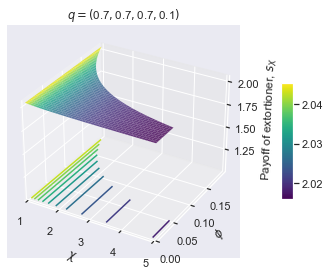

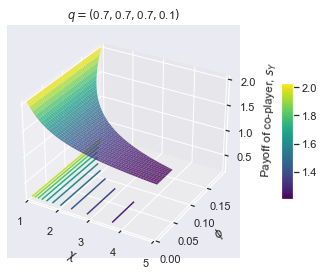

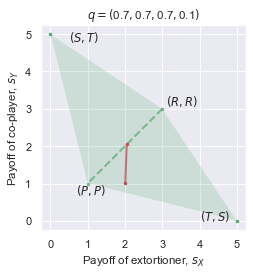

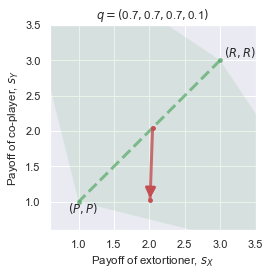

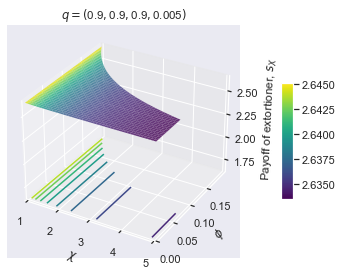

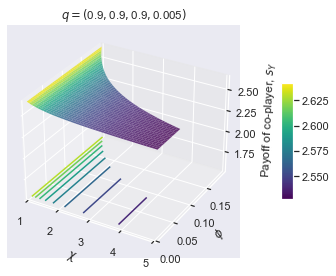

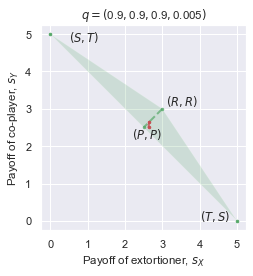

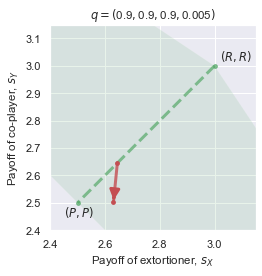

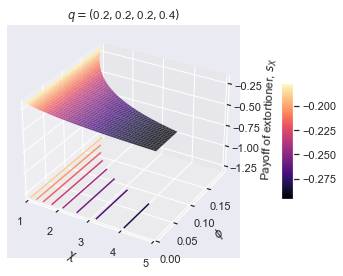

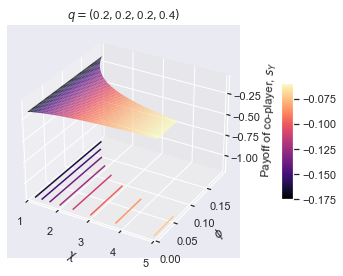

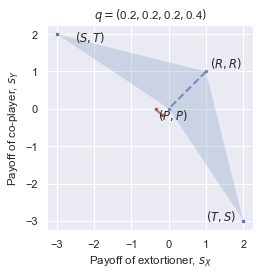

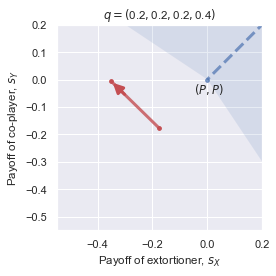

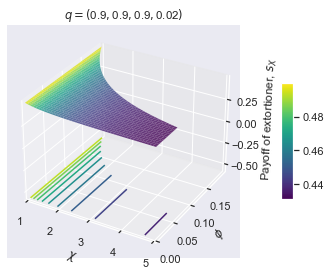

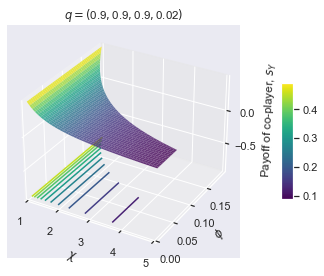

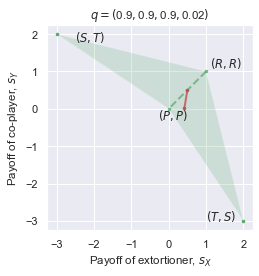

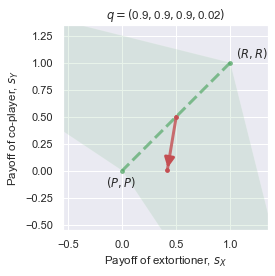

In [27]:
for i, q_subs in enumerate(q_subs_list):
    s_X_3D(s_X_ext, payoff_subs_list[i], phi_uppers[i], q_subs, colormaps[i], 13.5, names[i]) # s_X, 3D surface plot
    s_Y_3D(s_Y_ext, payoff_subs_list[i], phi_uppers[i], q_subs, colormaps[i], 13.5, names[i]) # s_Y, 3D surface plot
    # s_X and s_Y, quadrilateral plot
    payoff_quad(s_XC_ext, s_YC_ext, payoff_subs_list[i], q_subs, names[i])
    payoff_quad(s_XC_ext, s_YC_ext, payoff_subs_list[i], q_subs, names[i], zoom = True) # zoom in

### Class D
* $q_4 = h_D = [-(T + S - 2P)q_1 + (R - P)(q_2 + q_3) + T + S - R - P]/[2R - T - S]$

In [28]:
h_D = collect(collect(collect(solve(factor_0, q_4)[0], q_3), q_2), q_1)
s_XD_ext = cancel(s_X_ext.subs(q_4, h_D)); s_YD_ext = cancel(s_Y_ext.subs(q_4, h_D))
d_D1 = -fraction(collect(factor(s_XD_ext - P), chi))[1].coeff(chi, 1)
d_D1 = collect(collect(collect(d_D1, q_3), q_2), q_1)
num, deno = fraction(factor(diff(s_XD_ext, chi)))
target_D = factor(num/(T - S)) # target_D = a_{D0}*d_{D0}
d_D0, a_D0 = factor_list(target_D)[1][0][0], factor_list(target_D)[0]*factor_list(target_D)[1][1][0]
# d_D0: decreases wrt q_1, increases wrt q_2, increases wrt q_3 # need it to be negative
d_D0 = collect(collect(collect(d_D0, q_3), q_2), q_1) 
# a_d0: -(T + S - 2P)*q_1, increases wrt q_2, increases wrt q_3 # need it to be positive
a_D0 = collect(collect(collect(a_D0, q_3), q_2), q_1) 
a_D0, d_D0

#### Strategies near $q = (1, 0, 1, 0)$ Tit-for-Tat

* $q_1 = 1$, $q_2 = \delta$, $q_3 = 1 - \varepsilon$, and $q_4 = \frac{(R - P)(\delta - \varepsilon)}{2R - T - S}$

* $\delta \to 0$ and $\varepsilon \to 0$

* $\delta > \varepsilon$

In [29]:
factor(a_D0.subs(TitForTat_q)), factor(d_D0.subs(TitForTat_q))
h_D_sub = factor(h_D.subs([(q_1, 1), (q_2, delta), (q_3, 1 - epsilon)]))
q_subs = [(q_1, 1), (q_2, delta), (q_3, 1 - epsilon), (q_4, h_D_sub)]
factor(a_D0.subs(q_subs)), factor(d_D0.subs(q_subs))

1. #### $T + S > 2P$ 
2. #### $T + S = 2P$ 
3. #### $T + S < 2P$

> $d_{D0} < 0 < a_{D0}$ is the necessary and sufficient condition for $\frac{d s_X}{d \chi} < 0$

* 
  * Conventional IPD game
    * $(R, S, T, P) = (3, 0, 5, 1)$
  
  * General IPD game
    * $(R, S, T, P) = (3, 0, 5, 2.5)$
  
  * General IPD game
    * $(R, S, T, P) = (1, -3, 2, 0)$   

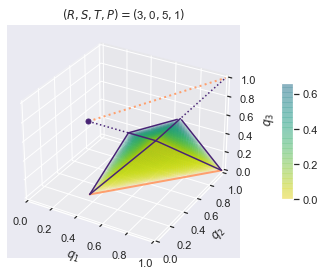

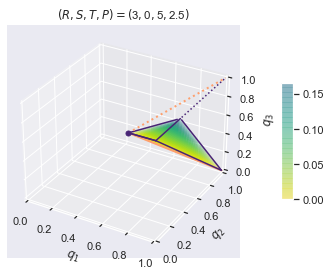

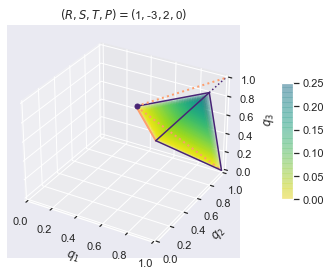

In [30]:
# region of Class D
target_D_plot(s_XD_ext, h_D) # Case 1: T + S > 2P
target_D_plot(s_XD_ext, h_D, payoff_eqn_subs, 'eqn') # Case 2: T + S = 2P
target_D_plot(s_XD_ext, h_D, payoff_abn_subs, 'abn') # Case 3: T + S < 2P

#### How would the payoffs $s_X$ and $s_Y$ change with respect to $\chi$ 

In [31]:
q_subs_D_con = [(q_1, 0.8), (q_2, 0.3), (q_3, 0.5), (q_4, 0.2)] # an example for Case 1
q_subs_D_eqn = [(q_1, 0.9), (q_2, 0.2), (q_3, 0.9), (q_4, 0.05)] # an example for Case 2
q_subs_D_abn = [(q_1, 0.8), (q_2, 0.45), (q_3, 0.9), (q_4, 0.05)] # an example for Case 3
q_subs_list = [q_subs_D_con, q_subs_D_eqn, q_subs_D_abn]
payoff_subs_list = [payoff_con_subs, payoff_eqn_subs, payoff_abn_subs]
phi_uppers = [phi_upper_con, phi_upper_con, phi_upper_abn]
colormaps = ['viridis', 'viridis', 'viridis']
names = ['D_con', 'D_eqn', 'D_abn']

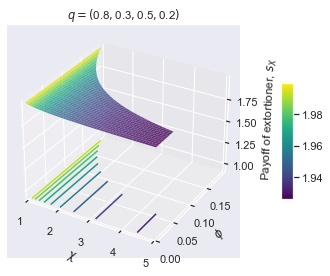

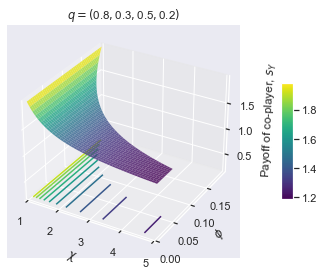

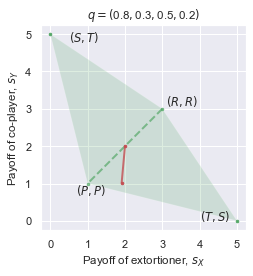

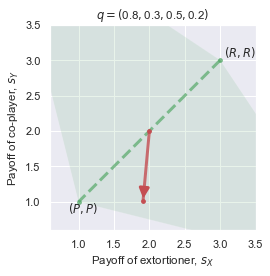

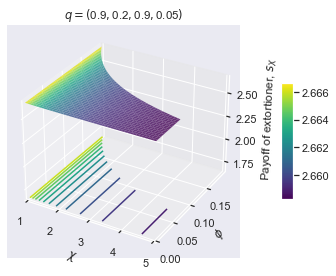

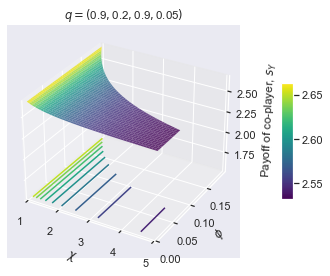

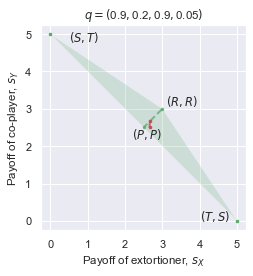

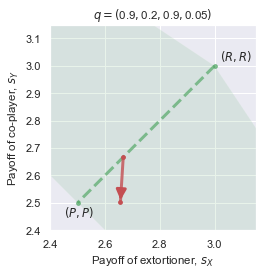

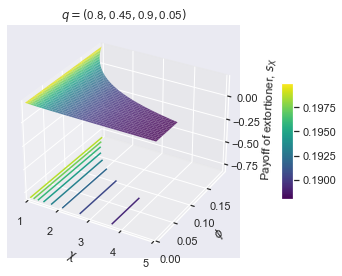

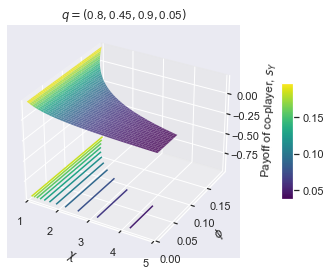

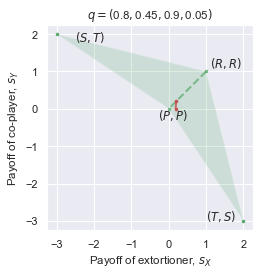

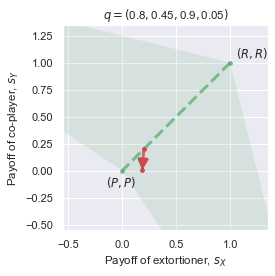

In [32]:
for i, q_subs in enumerate(q_subs_list):
    s_X_3D(s_X_ext, payoff_subs_list[i], phi_uppers[i], q_subs, colormaps[i], 13.5, names[i]) # s_X, 3D surface plot
    s_Y_3D(s_Y_ext, payoff_subs_list[i], phi_uppers[i], q_subs, colormaps[i], 13.5, names[i]) # s_Y, 3D surface plot
    # s_X and s_Y, quadrilateral plot
    payoff_quad(s_XD_ext, s_YD_ext, payoff_subs_list[i], q_subs, names[i])
    payoff_quad(s_XD_ext, s_YD_ext, payoff_subs_list[i], q_subs, names[i], zoom = True) # zoom in

# Rebuttal

## Part One: from extortionate ZD strategies to reactive strategies

> sections 12, 13, and 14 in the SI

* ### donation game

> $(R, S, T, P) = (b - c, -c, b, 0)$


* ### player X uses a reactive strategy 

> $p = (p_1, p_2, p_1, p_2)$

* ### player Y uses an unbending strategy

> $q \in $ Class A, B, C, or D

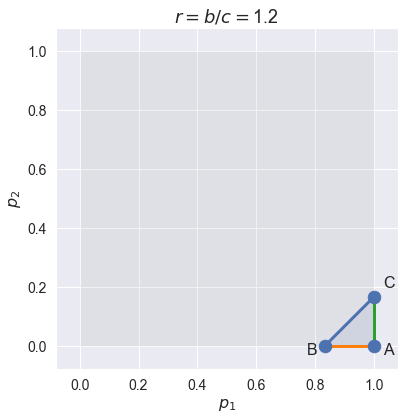

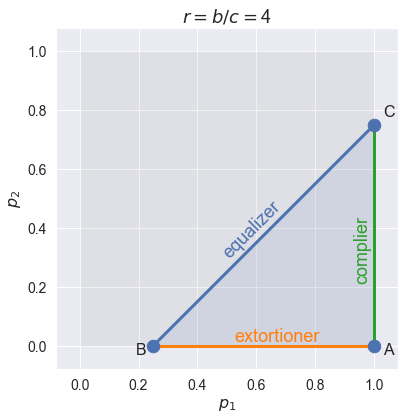

In [33]:
reactive_plot(ratio = 1.2)
reactive_plot(ratio = 4)

### Class A

> $q_1 = 1$, $q_3 = 0$, and $\begin{cases}q_a < q_2 < 1 \\ 0 < q_4 \leq h_A(q_2)\end{cases}$

#### $s_X(p_1, p_2)$

* $s_X(1, p_2) = b - c$
* $s_X(p_1, 1) = -c$
* $s_X(0, 0) = \frac{bq_4}{1 - q_2 + q_4}$


  > the maximum value of $s_X$ is either $b - c$ or $\frac{bq_4}{1 - q_2 + q_4}$
  
#### the maximum value of $s_X(p_1, p_2)$

* $s_X(p_1, p_2) - (b - c) = \frac{(1 - p_1)\Delta(p_1, p_2)}{(\ast)}$, where $(\ast) = (1 - q_2)[(1 - p_1) - q_4(p_2 - p_1)^2] + q_4(1 - p_2) > 0$

* $\Delta(p_1, p_2) = [bq_2q_4 + c(1 - q_2) - (b - c)q_4](1 - p_2) - b(1 - q_2)(q_4p_1 + 1 - q_4)$

    > $\downarrow$ wrt $p_1$, $\downarrow$ wrt $p_2$

* $\Delta(p_1, p_2) \leq 0 \Rightarrow \Delta(0, 0) = cq_4 - (b - c)(1 - q_2) \leq 0$

    > $q_4 \leq h_{Aa} = \frac{(b - c)(1 - q_2)}{c}$

In [34]:
s_XA_re = cancel(s_X_re.subs([(q_1, 1), (q_3, 0)])); s_YA_re = cancel(s_Y_re.subs([(q_1, 1), (q_3, 0)]))
q_a_re, h_A_re = factor(q_a.subs(payoff_dg_subs)), factor(h_A_con.subs(payoff_dg_subs)) # q_a < c/b, (b - c)/b
factor(s_XA_re.subs(p_1, 1)), factor(s_XA_re.subs(p_2, 1)) # if p_1 = 1, s_X = R = b - c, if p_2 = 1, s_X = S = -c
factor(s_XA_re.subs(p_1, 0).subs(p_2, 0)) # if p_1 = p_2 = 0
Delta_A = factor((s_XA_re - (b - c))*((1 - q_2)*(1 - p_1 - q_4*(p_2 - p_1)**2) + q_4*(1 - p_2))/(1 - p_1))
h_Aa_re = factor(solve(Delta_A.subs([(p_1, 0), (p_2, 0)]), q_4)[0])

#### partial derivatives of $s_X(p_1, p_2)$ with respect to $p_1$: $\frac{\partial s_X}{\partial p_1}$

> $\uparrow$ wrt $p_1$ and $\left.\frac{\partial s_X}{\partial p_1}\right|_{p_1 = 1} > 0$ $\qquad \Rightarrow \qquad$ as $p_1$ increases, $\frac{\partial s_X}{\partial p_1}$ $\begin{cases}- \to + &\text{or} \\ + \end{cases}$ 

* boundary $p_1 = 0$

  * $\left.\frac{\partial s_X(p_1, p_2)}{\partial p_1}\right|_{(0, 0)}$ can be positive or negative $\qquad \Rightarrow \qquad$ nonnegative if $q_4 \leq h_{a} = \frac{(bq_2 - c)(1 - q_2)}{b(1 - q_2) + c}$
  * $\left.\frac{\partial s_X(p_1, p_2)}{\partial p_1}\right|_{(0, 1)} = 0$
  * $\left.\frac{\partial s_X(p_1, p_2)}{\partial p_1}\right|_{(0, 1 - \epsilon)}$ can be positive or negative $\qquad \Rightarrow \qquad$ nonnegative if $q_4 \leq h_{aa} = \frac{b - c(1 - q_2)}{b(1 - q_2) + 2b + c}$

* boundary $p_2 = 0$

  * as $p_1$ increases, $\left.\frac{\partial s_X}{\partial p_1}\right|_{p_2 = 0}$ $\begin{cases}- \to + &\text{or} \\ + \end{cases}$
  * if $p_1 > \frac{c}{b}$, $\left.\frac{\partial s_X}{\partial p_1}\right|_{p_2 = 0} > 0$

* boundary $p_1 = 1$

  * $\left.\frac{\partial s_X}{\partial p_1}\right|_{p_1 = 1} > 0$

In [35]:
# take the partial derivative with respect to p_1
num, deno = fraction(factor(diff(s_XA_re, p_1)))
target_A = cancel(num/(q_4*(1 - p_2))) # a quadratic function of p_1 (parabola opening downwards)
e_2_re, e_1_re, e_0_re = [collect(target_A.coeff(p_1, i), q_4) for i in [2, 1, 0]]
factor(e_2_re.coeff(q_4, 1)), factor(e_2_re.coeff(q_4, 0)) # e_2 < 0, a linear function of q_4
factor((e_2_re + e_1_re + e_0_re)/(q_2*(1 - p_2) + p_2)) # evaluated at p_1 = 1
factor(2*e_2_re + e_1_re) # 2*e_2 + e_1 > 0, the axis of symmetry is on the right of p_1 = 1

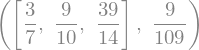

In [36]:
# when p_1 = 0
## when p_1 = 0 and p_2 = 0, the derivative can be positive or negative
num, deno = fraction(factor((diff(s_XA_re, p_1)).subs(p_1, 0).subs(p_2, 0)))
num = cancel(num/q_4) # a linear function of q_4
h_a_re = factor(solve(num, q_4)[0])
## when p_1 = 0 and p_2 = 1, the derivative is 0
factor((diff(s_XA_re, p_1)).subs(p_1, 0).subs(p_2, 1)) 
## when p_1 = 0 and p_2 = 1 - epsilon, the derivative can be positive or negative
num, deno = fraction(factor((diff(s_XA_re, p_1)).subs(p_1, 0).subs(p_2, 1 - epsilon)))
num = cancel(num/epsilon/q_4)
num = factor(num.subs(epsilon, 0)/(1 - q_2)) # can be positive or negative
factor(deno.subs(epsilon, 0)), factor(num.coeff(q_4, 1)), factor(num.coeff(q_4, 0))
h_aa_re = factor(solve(num, q_4)[0])
solve((h_aa_re - h_A_re).subs(b, 1.2).subs(c, 1), q_2), q_a_re.subs(b, 1.2).subs(c, 1) # no solution
solve((h_aa_re - h_A_re).subs(b, 2).subs(c, 1), q_2), q_a_re.subs(b, 2).subs(c, 1) # 2 solutions
solve((h_aa_re - h_A_re).subs(b, 10).subs(c, 1), q_2), q_a_re.subs(b, 10).subs(c, 1) # 3 solutions

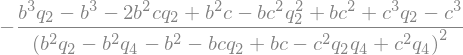

In [37]:
# when p_2 = 0
num, deno = fraction(factor(diff(s_XA_re, p_1).subs(p_2, 0)))
num = cancel(num/q_4) # a quadratic function of p_1 (parabola opening downwards)
e_2_re, e_1_re, e_0_re = [collect(num.coeff(p_1, i), q_4) for i in [2, 1, 0]]
factor((e_2_re + e_1_re + e_0_re)/q_2)
factor(2*e_2_re + e_1_re) # 2*e_2 + e_1 > 0, the axis of symmetry is on the right of p_1 = 1
# an example: q_2 = (b - c)/b = 1 - c/b
factor(h_a_re.subs(q_2, 1 - c/b)), factor(h_A_re.subs(q_2, 1 - c/b))
factor(num.subs(q_2, 1 - c/b).subs(q_4, (2*b - 3*c)/(4*b)).subs(p_1, c/(2*b - c)))
# p_1 = c/b
factor(diff(s_XA_re, p_1).subs(p_1, c/b).subs(p_2, 0)/(h_A_re - q_4)/b**2/q_4)

In [38]:
# when p_1 = 1
num, deno = fraction(factor((diff(s_XA_re, p_1)).subs(p_1, 1)))

#### partial derivatives of $s_X(p_1, p_2)$ with respect to $p_2$: $\frac{\partial s_X}{\partial p_2}$


* boundary $p_1 = 0$

  * $\left.\frac{\partial s_X(p_1, p_2)}{\partial p_2}\right|_{p_1 = 0} < 0$ 

* boundary $p_2 = 0$

> as $p_1$ increases, $\left.\frac{\partial s_X(p_1, p_2)}{\partial p_2}\right|_{p_2 = 0}$ $\begin{cases}- & \frac{(b - c)(1 + q_4)}{b(1 + q_4) + b - c} \leq q_2 \leq 1 \\ - \to + \end{cases}$

  

* boundary $p_1 = 1$

  * $\left.\frac{\partial s_X(p_1, p_2)}{\partial p_2}\right|_{p_1 = 1} = 0$

* pseudo-boundary $p_1 = 1 - \varepsilon$

    * $\left.\frac{\partial s_X(p_1, p_2)}{\partial p_2}\right|_{(1 - \varepsilon, 0)}$
  
    * $\left.\frac{\partial s_X(p_1, p_2)}{\partial p_2}\right|_{(1 - \varepsilon, 1)} < 0$


In [39]:
# take the partial derivative with respect to p_2
# when p_1 = 0
num, deno = fraction(factor(diff(s_XA_re, p_2).subs(p_1, 0)))
num = cancel(num/(1 - q_2))
num # negative (given that delta_A is negative)
e_2_re, e_1_re, e_0_re = [collect(num.coeff(p_2, i), q_4) for i in [2, 1, 0]]
delta_A = factor(s_XA_re.subs(p_1, 0) - s_XA_re.subs(p_1, 0).subs(p_2, 0))
delta_A = delta_A*(1 - q_2 + q_4)*((1 - q_2)*(1 - p_2**2*q_4) + q_4*(1 - p_2))
delta_A = cancel(delta_A/p_2/(1 - q_2))
delta_A, factor(num - (1 - q_4*p_2)*delta_A)
factor(delta_A.subs(p_2, 0)), factor(delta_A.subs(p_2, 1))
# a quadratic function of q_4 (parabola opening upwards)
collect(delta_A.subs(p_2, 0), q_4)
factor(delta_A.subs(p_2, 0).subs(q_4, 0)), factor(delta_A.subs(p_2, 0).subs(q_4, q_2 + c/b))
# compare h_A_re and q_2 + c/b, h_A_re < q_2 + c/b (use GeoGebra)

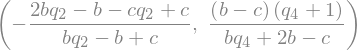

In [40]:
# when p_2 = 0
num, deno = fraction(factor(diff(s_XA_re, p_2)).subs(p_2, 0))
num = cancel(num/((1 - q_2)*(1 - p_1))) # a quadratic function of p_1 (parabola opening upwards)
e_2_re, e_1_re, e_0_re = [collect(num.coeff(p_1, i), q_4) for i in [2, 1, 0]]
factor(solve(factor(num.subs(p_1, 1)/q_4), q_4)[0]), factor(solve(factor(num.subs(p_1, 1)/q_4), q_2)[0])

In [41]:
# when p_1 = 1, the derivative is 0
factor(diff(s_XA_re, p_2).subs(p_1, 1))
# when p_1 = 1 - epsilon
## when p_2 = 0
num, deno = fraction(factor(diff(s_XA_re, p_2)).subs(p_1, 1 - epsilon).subs(p_2, 0))
num = cancel(num/epsilon/(1 - q_2))
num, deno = factor(num.subs(epsilon, 0)/q_4), factor(deno.subs(epsilon, 0)/q_4)
## when p_2 = (b - c)/b = 1 - c/b
num, deno = fraction(factor(diff(s_XA_re, p_2)).subs(p_1, 1 - epsilon).subs(p_2, 1 - c/b))
num = cancel(num/epsilon/(1 - q_2))
num, deno = factor(num.subs(epsilon, 0)*b**4/q_4), factor(deno.subs(epsilon, 0)*b**4/q_4)
factor((num/b**2).subs(q_2, q_a_re)), factor((num/b**2).subs(q_2, 1))
## when p_2 = 1
num, deno = fraction(factor(diff(s_XA_re, p_2)).subs(p_1, 1 - epsilon).subs(p_2, 1))
num = cancel(num/epsilon/(1 - q_2))
num = factor(num.subs(epsilon, 0)/q_4)
num, factor(sqrt(deno))

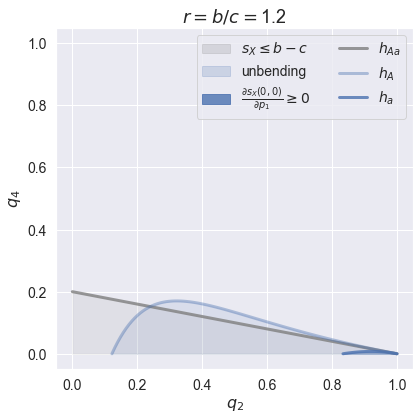

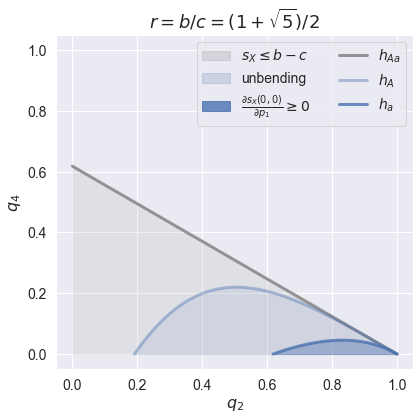

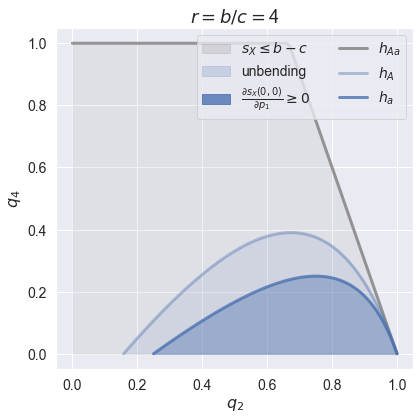

In [42]:
target_A_re_plot(s_XA_ext, s_XA_re, 1.2)
target_A_re_plot(s_XA_ext, s_XA_re, (1 + np.sqrt(5))/2)
target_A_re_plot(s_XA_ext, s_XA_re, 4)

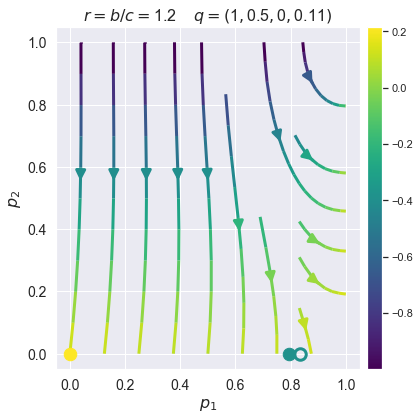

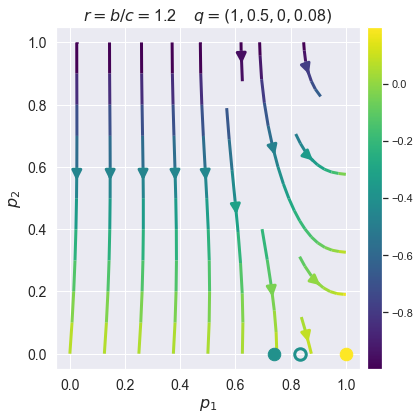

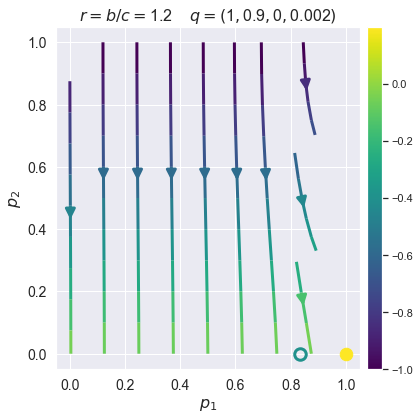

In [43]:
# benefit-cost ratio = 1.2
ratio = 1.2
# \max{s_X} > b - c, \partial s_X/ \partial p_1 |_(0, 0) < 0
q_subs_A_re_Aa = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.11)] 
# \max{s_X} = b - c, \partial s_X/ \partial p_1 |_(0, 0) < 0
q_subs_A_re_A = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.08)] 
# \max{s_X} = b - c, \partial s_X/ \partial p_1 |_(0, 0) > 0
q_subs_A_re_a = [(q_1, 1), (q_2, 0.9), (q_3, 0), (q_4, 0.002)]
tag_list = ['Aa', 'A', 'aaa']
for i, q_subs in enumerate([q_subs_A_re_Aa, q_subs_A_re_A, q_subs_A_re_a]):
    # \partial s_X/ \partial p_2 |_(1 - epsilon, 0) < 0
    s_X_stream(s_XA_re, ratio, q_subs, tag = tag_list[i])

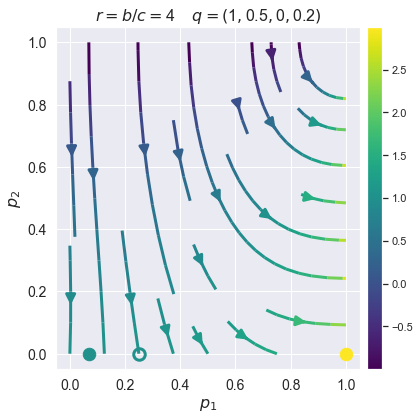

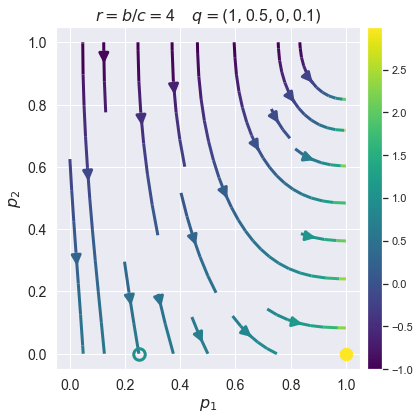

In [44]:
# benefit-cost ratio = 4
ratio = 4
# \max{s_X} = b - c, \partial s_X/ \partial p_1 |_(0, 0) < 0
q_subs_A_re_A = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.2)] 
# \max{s_X} = b - c, \partial s_X/ \partial p_1 |_(0, 0) > 0
q_subs_A_re_a = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.1)]
tag_list = ['A', 'aaa']
for i, q_subs in enumerate([q_subs_A_re_A, q_subs_A_re_a]):
    # \partial s_X/ \partial p_2 |_(1 - epsilon, 0) < 0
    s_X_stream(s_XA_re, ratio, q_subs, tag = tag_list[i])

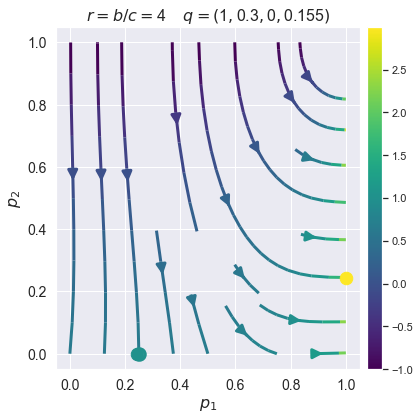

In [45]:
# \max{s_X} = b - c, \partial s_X/ \partial p_1 |_(0, 0) < 0
# \partial s_X/ \partial p_2 |_(1 - epsilon, 0) > 0
ratio = 4
q_subs_A_re_ax = [(q_1, 1), (q_2, 0.3), (q_3, 0), (q_4, 0.155)]
s_X_stream(s_XA_re, ratio, q_subs_A_re_ax, tag = 'ax')

### Class D

> $q_4 = h_D = q_2 + q_3 - q_1$

> $b(q_2 - q_1) + c(q_3 - q_1) + c = d_0 < 0 < a_0 = (b - c)(q_2 + q_3 - q_1)$

#### $s_X(p_1, p_2)$

> $\max s_X(p_1, p_2) = s_X(1, 1) = \frac{(b - c)q_3 - c(1 - q_1)}{1 - q_1 + q_3}$

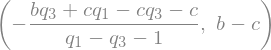

In [46]:
h_D_re = factor(h_D.subs(payoff_dg_subs))
a_D0_re, d_D0_re = factor(a_D0.subs(payoff_dg_subs)), factor(d_D0.subs(payoff_dg_subs))
s_XD_re = cancel(s_X_re.subs([(q_4, h_D_re)]))
s_YD_re = cancel(s_Y_re.subs([(q_4, h_D_re)]))
factor(s_XD_re.subs(p_1, 1).subs(p_2, 1)), factor(s_XD_re.subs(p_1, 1).subs(q_1, 1))

In [47]:
Delta_D = factor(s_XD_re - s_XD_re.subs(p_1, 1).subs(p_2, 1)) # negative
Delta_D = factor(Delta_D*(1 - q_1 + q_3)/d_D0_re)
Delta_D = factor(Delta_D/(q_3*(1 - p_1) + (1 - q_1)*(1 - p_2)))
Delta_D = factor(Delta_D*(1 - q_1 + q_3 + (q_1 - q_2)*(p_2 - p_1)))
Delta_D

#### partial derivatives of $s_X(p_1, p_2)$ with respect to $p_1$: $\frac{\partial s_X}{\partial p_1}$

> independent of $p_1$ and $+$

#### partial derivatives of $s_X(p_1, p_2)$ with respect to $p_2$: $\frac{\partial s_X}{\partial p_2}$

> independent of $p_2$ and $+$

In [48]:
# take the partial derivative with respect to p_1, the derivative is positive
num, deno = fraction(factor(diff(s_XD_re, p_1)))
num = cancel(num/-d_D0_re)
# take the partial derivative with respect to p_2, the derivative is positive
num, deno = fraction(factor(diff(s_XD_re, p_2)))
num = cancel(num/-d_D0_re)

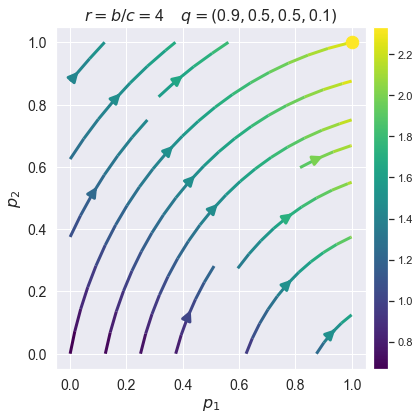

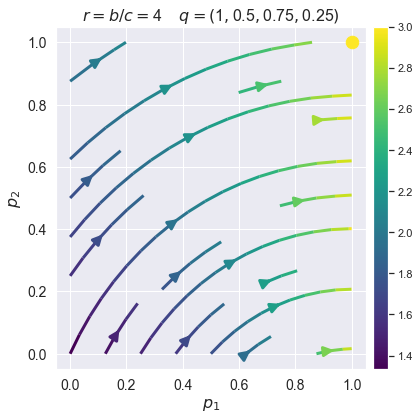

In [49]:
# benefit-cost ratio = 4
ratio = 4
q_subs_D_re = [(q_1, 0.9), (q_2, 0.5), (q_3, 0.5), (q_4, 0.1)] 
s_X_stream(s_XD_re, ratio, q_subs_D_re, tag = 'D')
q_subs_D_re = [(q_1, 1), (q_2, 0.5), (q_3, 0.75), (q_4, 0.25)] 
s_X_stream(s_XD_re, ratio, q_subs_D_re, tag = 'D_gen')

## Part Two: from extortionate ZD strategies to general ZD strategies

> section 15 in the SI

* ### donation game

> $(R, S, T, P) = (b - c, -c, b, 0)$


* ### player X uses a reactive ZD strategy 

> $$\begin{cases}
p_1 = 1 - \frac{(b - c - O)(\chi - 1)}{b\chi + c}, \\
p_2 = \frac{O(\chi - 1)}{b\chi + c}.
\end{cases} \qquad \chi \geq 1 \qquad \text{and} \qquad 0 \leq O \leq b - c$$

* ### player Y uses an unbending strategy

> $q \in $ Class A, B, C, or D


### Class A

> $q_1 = 1$, $q_3 = 0$, and $\begin{cases}q_a < q_2 < 1 \\ 0 < q_4 \leq h_A(q_2)\end{cases}$

* $\frac{\partial s_X}{\partial O} |_{(b - c, \chi)}$
* $\frac{\partial s_X}{\partial O} |_{(O, 1)} = 0$
* $\frac{\partial s_X}{\partial \chi} |_{(b - c, \chi)} = 0$
* $\frac{\partial s_X}{\partial \chi} |_{(O, 1)} < 0$


In [50]:
s_XA_re_ZD = cancel(s_X_re_ZD.subs([(q_1, 1), (q_3, 0)]))
s_YA_re_ZD = cancel(s_Y_re_ZD.subs([(q_1, 1), (q_3, 0)]))

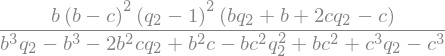

In [51]:
factor(factor(diff(s_XA_re_ZD, O).subs(O, b - c)*(c*chi + b)*((b - c + c*q_2)*chi - (b - c - b*q_2))*q_4/(chi - 1)))
#factor(diff(s_XA_re_ZD, O).subs(chi, 1))
#factor(diff(s_XA_re_ZD, chi).subs(O, b - c))
factor(factor(diff(s_XA_re_ZD, chi).subs(chi, 1)*q_2*q_4*(b + c)/(b - c - O)).subs(q_4, h_A_re))


In [52]:
# benefit-cost ratio = 4
ratio = 4
q_subs_A_re_A = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.2)] 
q_subs_A_re_a = [(q_1, 1), (q_2, 0.5), (q_3, 0), (q_4, 0.1)]
tag_list = ['A', 'aaa']

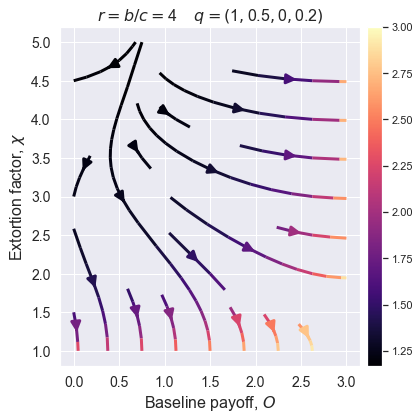

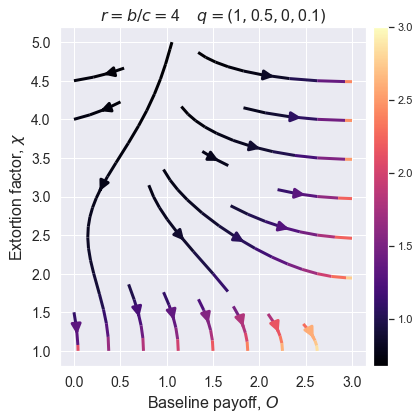

In [53]:
for i, q_subs in enumerate([q_subs_A_re_A, q_subs_A_re_a]):
    s_X_stream_ZD(s_XA_re_ZD, ratio, q_subs, cmap = 'magma', tag = tag_list[i])

### Class D

> $q_4 = h_D = q_2 + q_3 - q_1$

> $b(q_2 - q_1) + c(q_3 - q_1) + c = d_0 < 0 < a_0 = (b - c)(q_2 + q_3 - q_1)$

* $\frac{\partial s_X}{\partial O} \geq 0$ (the equality holds at $\chi = 1$)

In [54]:
s_XD_re_ZD = cancel(s_X_re_ZD.subs([(q_4, h_D_re)]))
s_YD_re_ZD = cancel(s_Y_re_ZD.subs([(q_4, h_D_re)]))

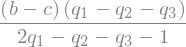

In [55]:
factor(factor(1/diff(s_XD_re_ZD, O)*(chi - 1)*-d_D0_re).coeff(chi, 1) + d_D0_re)
factor(fraction(factor(diff(s_XD_re_ZD, chi)/-d_D0_re/(b + c)))[0].coeff(O, 0))
temp = -factor_list(fraction(factor(diff(s_XD_re_ZD, chi)/-d_D0_re/(b + c)))[1])[1][0][0]
factor(temp.coeff(chi, 0))
factor(solve([general_ZD_p[0][1] - q_1, general_ZD_p[1][1] - q_2, 
       general_ZD_p[2][1] - q_3], [O, chi, phi])[0][0].subs(payoff_dg_subs))


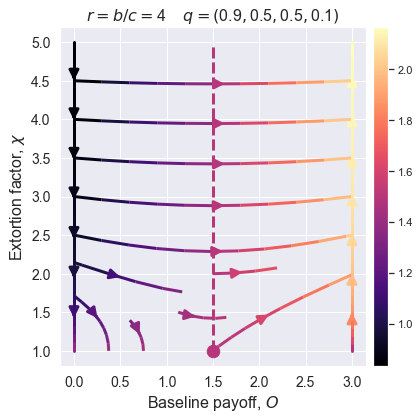

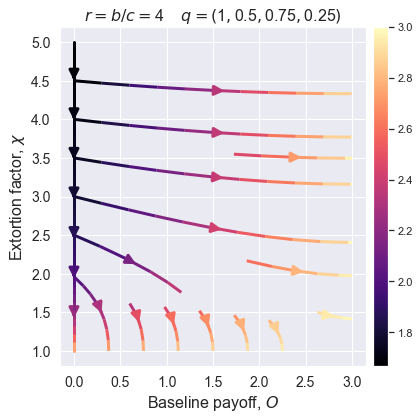

In [56]:
# benefit-cost ratio = 4
ratio = 4
q_subs_D_re = [(q_1, 0.9), (q_2, 0.5), (q_3, 0.5), (q_4, 0.1)] # O = 1.5, chi = 2
s_X_stream_ZD(s_XD_re_ZD, ratio, q_subs_D_re, cmap = 'magma', tag = 'D')
q_subs_D_re = [(q_1, 1), (q_2, 0.5), (q_3, 0.75), (q_4, 0.25)] # O = R = b - c = 3, chi = 2
s_X_stream_ZD(s_XD_re_ZD, ratio, q_subs_D_re, cmap = 'magma', tag = 'D_gen')

## Part Three: unbending for $O > P$?

> section 16, 17, and 18 in the SI

### How can $s_X$ be independent of $\phi$

#### Solution X
* $q_1 = q_2 = 1$

> e.g. $q_1 = q_2 = q_3 = 1$ (solution C)

#### Solution O
* $q_2 = 1$ and $q_4 = 0$

> e.g. $q_2 = q_3 = 1$ and $q_4 = 0$

* $q_3 = q_4 = 0$

> e.g. $q_2 = q_3 = q_4 = 0$ (solution B)

#### Solution A
* $q_1 = 1$ and $q_3 = 0$

> e.g. $q_1 = 1$ and $q_2 = q_3 = 0$

#### Solution B
* $q_2 = q_3 = q_4 = 0$


#### Solution C
* $q_1 = q_2 = q_3 = 1$
* $q_1 = q_2 = q_3 = q_4$
* Special (Class S)
  * $q_1 = \frac{O - P - (T + S - O - P)q_2}{O - P - (T + S - R - P)q_2}$, $q_2 = q_3$, 
and $q_4 = \frac{(O - P)(1 - q_2)}{(T + S - O - P) - (T + S - R - P)q_2}$
  * to put it another way
  * $q_1 = \frac{(O + P - T - S)q_2 + O - P}{(R + P - T - S)q_2 + O - P}$, $q_2 = q_3$, 
and $q_4 = \frac{(O - P)(1 - q_2)}{(R + P - T - S)q_2 - (O + P - T - S)}$

#### Solution D
* $q_4 = h_D = [-(T + S - 2P)q_1 + (R - P)(q_2 + q_3) + T + S - R - P]/[2R - T - S]$

In [57]:
# general IPD game with T + S >= 2O (similar for T + S < 2O)
phi_sub = 1/(chi*(T - O) + (O - S))
num, deno = fraction(factor(s_X_gen.subs(phi, phi_sub) - s_X_gen.subs(phi, phi_sub/2)))
# target: a chi-free term*a quadratic function of chi
target = factor(num/(chi*(T - S)*((T - O)*chi + O - S)))
factor_1 = factor_list(target)[1][1][0] # a quadratic function of chi
factor_0 = factor_list(target)[1][0][0]*factor_list(target)[0] # a chi-free term, Solution D: q_4 = h_D
factor_1 = collect(factor_1, chi)
f_12, f_11, f_10 = [factor_1.coeff(chi, i) for i in [2, 1, 0]]
factor(f_12 + f_11 + f_10) # q_1 = 1, q_4 = 0, or q_2 = q_3

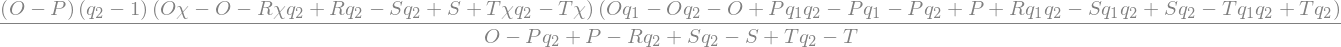

In [58]:
# q_1 = 1
solve(factor(factor_1.subs(q_1, 1))) # q_2 = 1 or q_3 = 0
# q_4 = 0
solve(factor(factor_1.subs(q_4, 0))) # q_2 = 1 or q_3 = 0
# q_2 = q_3
temp = factor(factor_1.subs(q_3, q_2)/(chi - 1))
f_11, f_10 = temp.coeff(chi, 1), temp.coeff(chi, 0)
## f_11 is free of q_1
factor(f_11.coeff(q_1, 1) + f_11.coeff(q_1, 0)) # q_2 = 0 or q_2 = 1
## f_11 is not free of q_1
q_1_sub = solve(f_11, q_1)[0] # q_1 = q_1_sub
factor(f_10.subs(q_1, q_1_sub)) # q_2 = 0, q_2 = 1, q_2 = q_4, or q_4 = q_4_sub
q_4_sub = solve(f_10.subs(q_1, q_1_sub), q_4)[1]
q_1_sub = factor(q_1_sub.subs(q_4, q_4_sub))
## q_2 = q_3 = 0
factor(temp.subs(q_2, 0)) # q_4 = 0 or q_1 = 1
## q_2 = q_3 = 1
factor(temp.subs(q_2, 1)) # q_4 = 0 or q_1 = 1
## q_2 = q_3 = q_4
factor(temp.subs(q_4, q_2)) # q_2 = 0 or q_1 = q_2
## q_2 = q_3, q_4 = q_4_sub
factor(temp.subs(q_4, q_4_sub)) # q_2 = 1 or q_1 = q_1_sub

### ~~Class X~~ 
* $q_1 = q_2 = 1$
$$s_X = \frac{(T - S)(R - O)\chi}{(R - S)\chi + (T - R)} + O \qquad \frac{ds_X}{d\chi} = \frac{(T - R)(T - S)(R - O)}{[(R - S)\chi + (T - R)]^2} \geq 0$$ 
> the equality holds if $O = R$

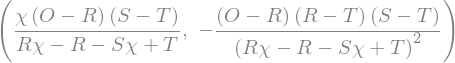

In [59]:
# Class X
s_XX_gen = collect(cancel(s_X_gen.subs([(q_1, 1), (q_2, 1)])), chi)
factor(s_XX_gen - O), factor(diff(s_XX_gen, chi))

### Class O

* $q_2 = 1$ and $q_4 = 0$

> e.g. $q_2 = q_3 = 1$ and $q_4 = 0$
> * $T + S < 2O: \qquad 0 \leq q_1 < \frac{2O - T - S}{R + O - T - S}$

* $q_3 = q_4 = 0$

$$s_X = -\frac{(T - S)(O - P)\chi}{(T - P)\chi + (P - S)} + O \qquad \frac{d s_X}{d \chi} = -\frac{(T - S)(P - S)(O - P)}{[(T - P)\chi + (P - S)]^2} \leq 0$$

> the equality holds if $O = P$


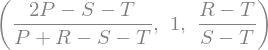

In [60]:
# q_2 = 1 and q_4 = 0
# a quadratic rational function of chi
s_XO_gen = factor(collect(cancel(s_X_gen.subs([(q_2, 1), (q_4, 0)])), chi))
# when q_3 = 1
# a quadratic function of q_1, = (T - R)(R - O)(O - P), nonnegative when q_1 = 1
target_O_gen = factor(fraction(factor(diff(s_XO_gen.subs(q_3, 1), chi)))[0]/(T - S)/(O - P))
# 0 <= q_1 < root_1
root_1 = factor(solve(target_O_gen, q_1)[0]) # (2O - T - S)/(O + R - T - S)
root_2 = factor(solve(target_O_gen, q_1)[1]) # >= 1
factor(root_1.subs(O, P)), factor(root_2.subs(O, P)), factor(root_2.subs(O, R) - 1)

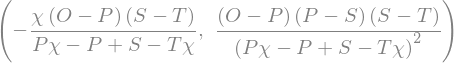

In [61]:
# q_3 = q_4 = 0
s_XO_gen = collect(cancel(s_X_gen.subs([(q_3, 0), (q_4, 0)])), chi)
factor(s_XO_gen - O), factor(diff(s_XO_gen, chi))

### Class A

* $q_1 = 1$ and $q_3 = 0$

In [62]:
s_XA_gen = cancel(s_X_gen.subs([(q_1, 1), (q_3, 0)]))
s_YA_gen = cancel(s_Y_gen.subs([(q_1, 1), (q_3, 0)]))

In [63]:
# T + S = 2P, g(1) = e_2 + e_1 + e_0 <= 0 is the necessary and sufficient condition 
# for ZD’s payoff to be monotonically decreasing with respect to chi
target_A = factor(fraction(factor(diff(s_XA_gen.subs(P, (T + S)/2), chi)))[0]/(T - S)/(R - O))
e_2, e_1, e_0 = [collect(target_A.coeff(chi, i), q_4) for i in [2, 1, 0]]
Gamma_gen = factor(factor((e_2 + e_1 + e_0)/2/(T - S)**2/q_2/q_4))
gamma_gen = factor((2*e_2 + e_1)/4/(T - S)/q_2/q_4)
factor((T - O)*Gamma_gen - gamma_gen)

In [64]:
# T + S < 2P, g(1) = e_2 + e_1 + e_0 <= 0 is the necessary and sufficient condition 
# for ZD’s payoff to be monotonically decreasing with respect to chi
# similar to the argument for O = P
target_A = factor(fraction(factor(diff(s_XA_gen, chi)))[0]/(T - S)/(R - O))
e_2, e_1, e_0 = [collect(target_A.coeff(chi, i), q_4) for i in [2, 1, 0]]
Gamma_gen = factor((e_2 + e_1 + e_0)/(T - S)**2/q_2/q_4)
factor(Gamma_gen.coeff(q_4, 0))
gamma_gen = factor((2*e_2 + e_1)/2/(T - S)/q_2/q_4)
factor(gamma_gen.coeff(q_4, 0)/(q_2 - 1) - (T - S)*(R - P))
factor((T - O)*Gamma_gen - gamma_gen)
temp = factor(((T - O)**2*q_2*q_4*Gamma_gen - e_2)/(1 - q_2)/((O + P - T - S)*q_4 + O - P))
factor(temp.coeff(q_4, 0))

### Class B

* $q_2 = q_3 = q_4 = 0$

$$s_X = -\frac{(T - S)(O - P)\chi}{(T - P)\chi + P - S} + O \qquad \frac{d s_X}{d \chi} = -\frac{(T - S)(P - S)(O - P)}{[(T - P)\chi + P - S]^2} \leq 0$$

> the equality holds if $O = P$

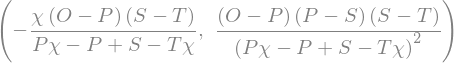

In [65]:
s_XB_gen = cancel(s_X_gen.subs([(q_2, 0), (q_3, 0), (q_4, 0)]))
s_YB_gen = cancel(s_Y_gen.subs([(q_2, 0), (q_3, 0), (q_4, 0)]))
factor(s_XB_gen - O), factor(diff(s_XB_gen, chi)) 

### Class C

* $q_1 = q_2 = q_3 = 1$
$$s_X = \frac{(T - S)(R - O)\chi}{(R - S)\chi + (T - R)} + O \qquad \frac{ds_X}{d\chi} = \frac{(T - R)(T - S)(R - O)}{[(R - S)\chi + (T - R)]^2} \geq 0$$ 
  > the equality holds if $O = R$

* $q_1 = q_2 = q_3 = q_4$

  > $\text{target} = -[(T + S - R - P)q_1 + P - S][(T + S - R - P)q_1^2 - (T + S - 2P)q_1 + O - P]$

  > $\text{target} < 0$ if $0 \leq q_1 < (\ast)$, where $(\ast)$ is a root of the second factor.


* Special (Class S)
  * $q_1 = \frac{O - P - (T + S - O - P)q_2}{O - P - (T + S - R - P)q_2}$, $q_2 = q_3$, 
and $q_4 = \frac{(O - P)(1 - q_2)}{(T + S - O - P) - (T + S - R - P)q_2}$
  * to put it another way
  * $q_1 = \frac{(O + P - T - S)q_2 + O - P}{(R + P - T - S)q_2 + O - P}$, $q_2 = q_3$, 
and $q_4 = \frac{(O - P)(1 - q_2)}{(R + P - T - S)q_2 - (O + P - T - S)}$

> $s_X = s_Y = O$

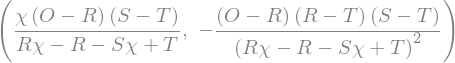

In [66]:
# q_1 = q_2 = q_3 = 1
s_XC_gen = cancel(s_X_gen.subs([(q_1, 1), (q_2, 1), (q_3, 1)]))
s_YC_gen = cancel(s_Y_gen.subs([(q_1, 1), (q_2, 1), (q_3, 1)]))
factor(s_XC_gen - O), factor(diff(s_XC_gen, chi)) # the derivative is always positive

In [67]:
# q_1 = q_2 = q_3 = q_4
s_XC_gen = cancel(s_X_gen.subs([(q_2, q_1), (q_3, q_1), (q_4, q_1)]))
s_YC_gen = cancel(s_Y_gen.subs([(q_2, q_1), (q_3, q_1), (q_4, q_1)]))
num, deno = fraction(factor(diff(s_XC_gen, chi)))
target_C_gen = factor(num/(T - S))
factor_C0 = collect(factor_list(target_C_gen)[1][0][0], q_1)
factor_C1 = collect(factor_list(target_C_gen)[1][1][0], q_1)
factor_C0, factor(factor_C0.subs(q_1, 0)), factor(factor_C0.subs(q_1, 1)) # always negative
factor_C1, factor(factor_C1.subs(q_1, 0)), factor(factor_C1.subs(q_1, 1)) # first positive then negative

In [68]:
s_XC_gen = cancel(s_X_gen.subs([(q_1, q_1_sub), (q_3, q_2), (q_4, q_4_sub)]))
s_YC_gen = cancel(s_Y_gen.subs([(q_1, q_1_sub), (q_3, q_2), (q_4, q_4_sub)]))
s_XC_gen, s_YC_gen

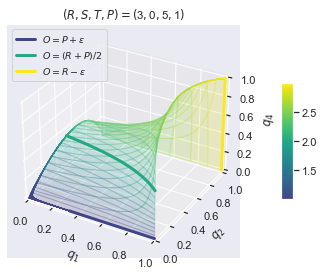

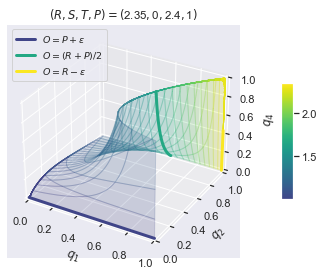

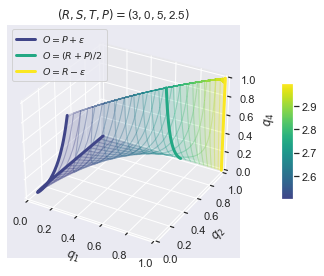

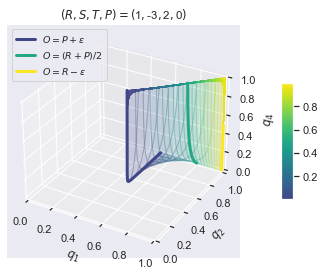

In [69]:
target_S_plot(s_X_gen, payoff_con_subs, 'viridis')
target_S_plot(s_X_gen, payoff_insane_subs, 'viridis', name = 'con_x')
target_S_plot(s_X_gen, payoff_eqn_subs, 'viridis', name = 'eqn')
target_S_plot(s_X_gen, payoff_abn_subs, 'viridis', name = 'abn')

### Class D

* When s_X's O < s_Y's O, it is better off by increasing O and decreasing chi.
 
* When s_X's O > s_Y's O, it is better off by increasing O and increasing chi.

In [70]:
s_XD_gen = cancel(s_X_gen.subs(q_4, h_D))
s_YD_gen = cancel(s_Y_gen.subs(q_4, h_D))
factor(s_XD_gen - O)
d_D1 = -fraction(collect(factor(s_XD_gen - O), chi))[1].coeff(chi, 1)
d_D0 = -fraction(collect(factor(s_XD_gen - O), chi))[1].coeff(chi, 0)
a_D0 = factor(-fraction(collect(factor(s_XD_gen - O), chi))[0]/(T - S)/chi)
a_D00 = factor(h_D*(2*R - T - S))